In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import seaborn as sns


In [3]:
df= pd.read_csv("../output/scenes_data.tsv", sep='\t')

In [4]:
df

,onset,duration,onset_frame,episode,scene_number,global_scene_number
0,0.000,17.986,1,friends_s01e01a,1,1
1,17.986,4.705,540,friends_s01e01a,2,2
2,22.691,4.238,681,friends_s01e01a,3,3
3,26.928,0.868,808,friends_s01e01a,4,4
4,27.796,2.269,834,friends_s01e01a,5,5
...,...,...,...,...,...,...
47654,648.282,11.646,19429,friends_s06e24b,154,47655
47655,659.927,6.407,19778,friends_s06e24b,155,47656
47656,666.334,6.407,19970,friends_s06e24b,156,47657
47657,672.741,6.574,20162,friends_s06e24b,157,47658


In [8]:
df["season"] = df["episode"].str.extract(r's(\d+)', expand=False).astype(int)
df["episode_short"] = df["episode"].str.extract(r'(s\d+e\d+)', expand=False).str.upper()
mean_duration = df.groupby("episode_short", as_index=False)["duration"].mean()


In [10]:
df

,onset,duration,onset_frame,episode,scene_number,global_scene_number,episode_short,season
0,0.000,17.986,1,friends_s01e01a,1,1,S01E01,1
1,17.986,4.705,540,friends_s01e01a,2,2,S01E01,1
2,22.691,4.238,681,friends_s01e01a,3,3,S01E01,1
3,26.928,0.868,808,friends_s01e01a,4,4,S01E01,1
4,27.796,2.269,834,friends_s01e01a,5,5,S01E01,1
...,...,...,...,...,...,...,...,...
47654,648.282,11.646,19429,friends_s06e24b,154,47655,S06E24,6
47655,659.927,6.407,19778,friends_s06e24b,155,47656,S06E24,6
47656,666.334,6.407,19970,friends_s06e24b,156,47657,S06E24,6
47657,672.741,6.574,20162,friends_s06e24b,157,47658,S06E24,6


In [6]:
mean_duration

,episode_short,duration
0,S01E01,4.191790
1,S01E02,3.792538
2,S01E03,3.682223
3,S01E04,4.280303
4,S01E05,4.175952
...,...,...
137,S06E20,3.746728
138,S06E21,3.391255
139,S06E22,3.856738
140,S06E23,3.863441


/tmp/ipykernel_20485/3446811800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=mean_duration, x="episode_short", y="duration", palette="viridis")


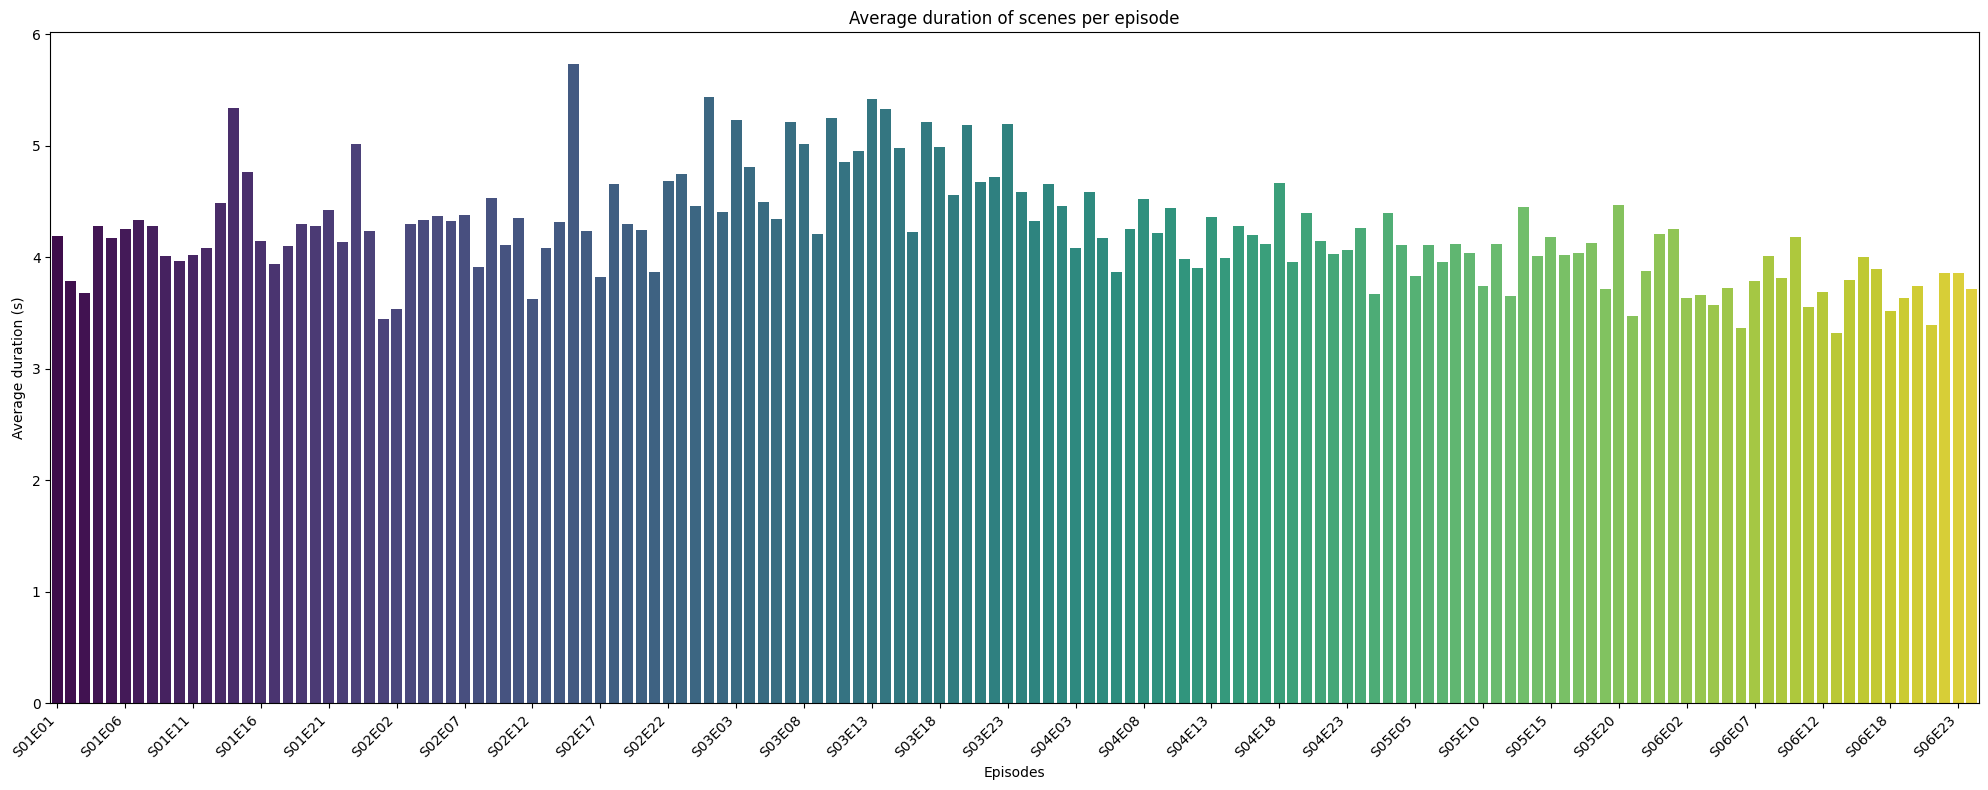

In [7]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=mean_duration, x="episode_short", y="duration", palette="viridis")
ax.set_xticks(ax.get_xticks()[::5])  # show every 5th label
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Average duration of scenes per episode")
plt.ylabel("Average duration (s)")
plt.xlabel("Episodes")
plt.tight_layout()
plt.show()


In [12]:

scene_count = df.groupby("episode_short")["scene_number"].count().reset_index(name="num_scenes")

/tmp/ipykernel_18992/441019428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=scene_count, x="episode_short", y="num_scenes", palette="viridis")


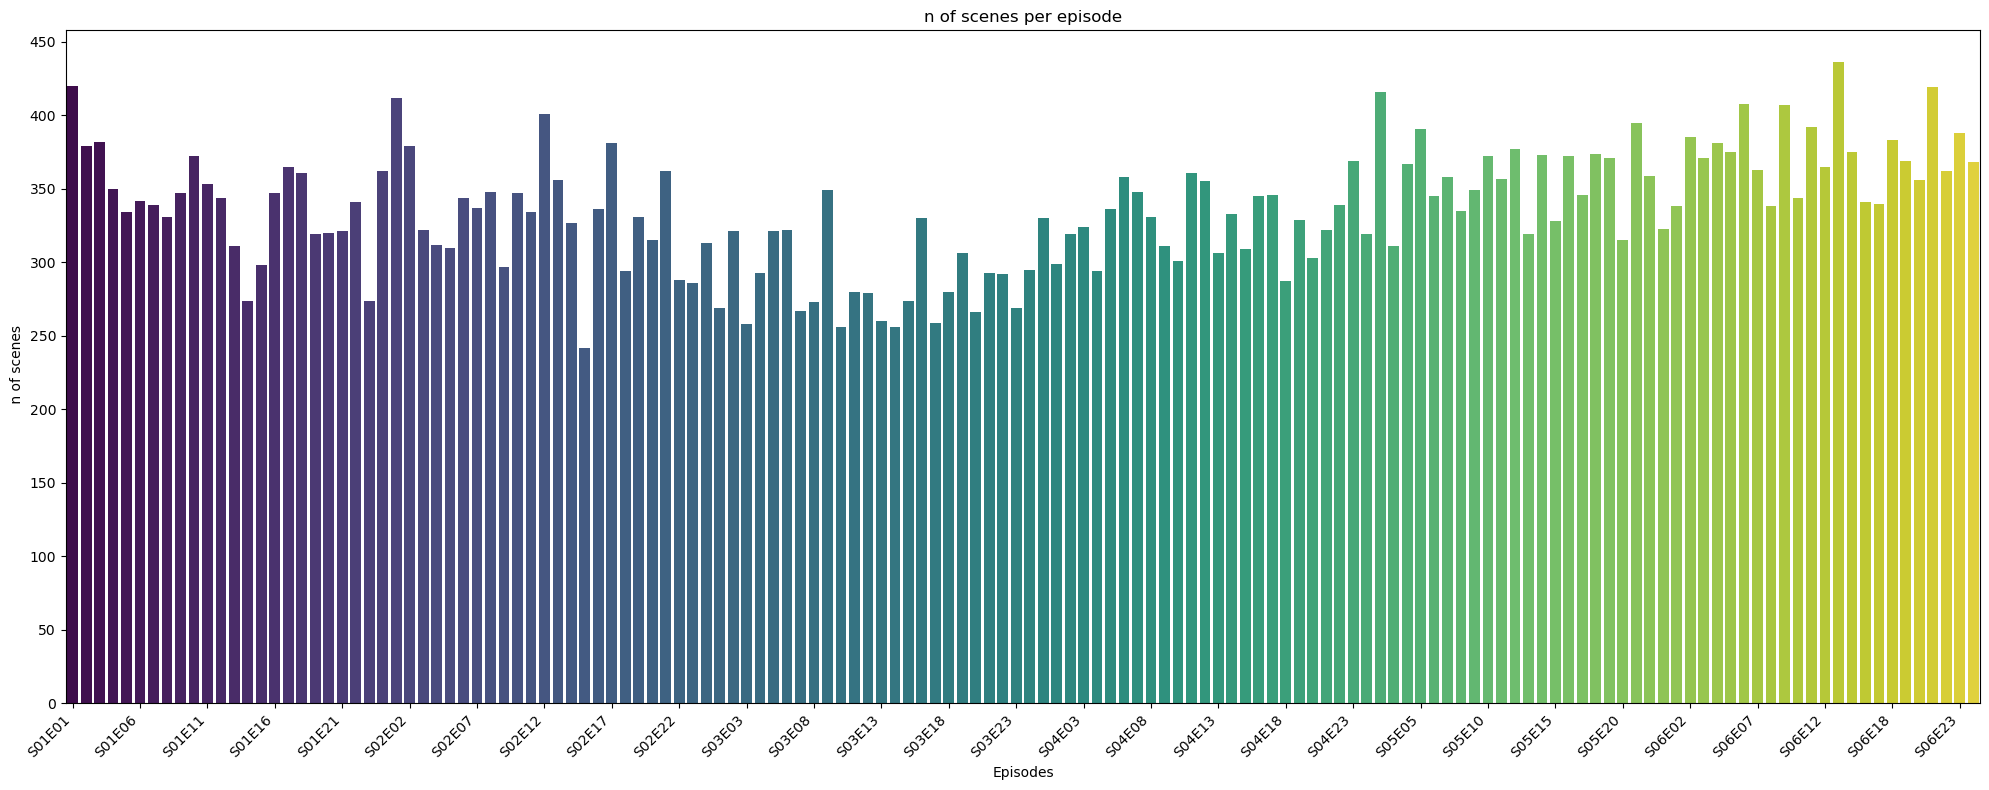

In [13]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=scene_count, x="episode_short", y="num_scenes", palette="viridis")
ax.set_xticks(ax.get_xticks()[::5])  # show every 5th label
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_yticks(range(0, 500, 50)) 
plt.title("n of scenes per episode")
plt.ylabel(" n of scenes")
plt.xlabel("Episodes")
plt.tight_layout()
plt.show()

In [20]:
episode_durations = df.groupby("episode_short")["duration"].sum().reset_index(name="episode_duration")

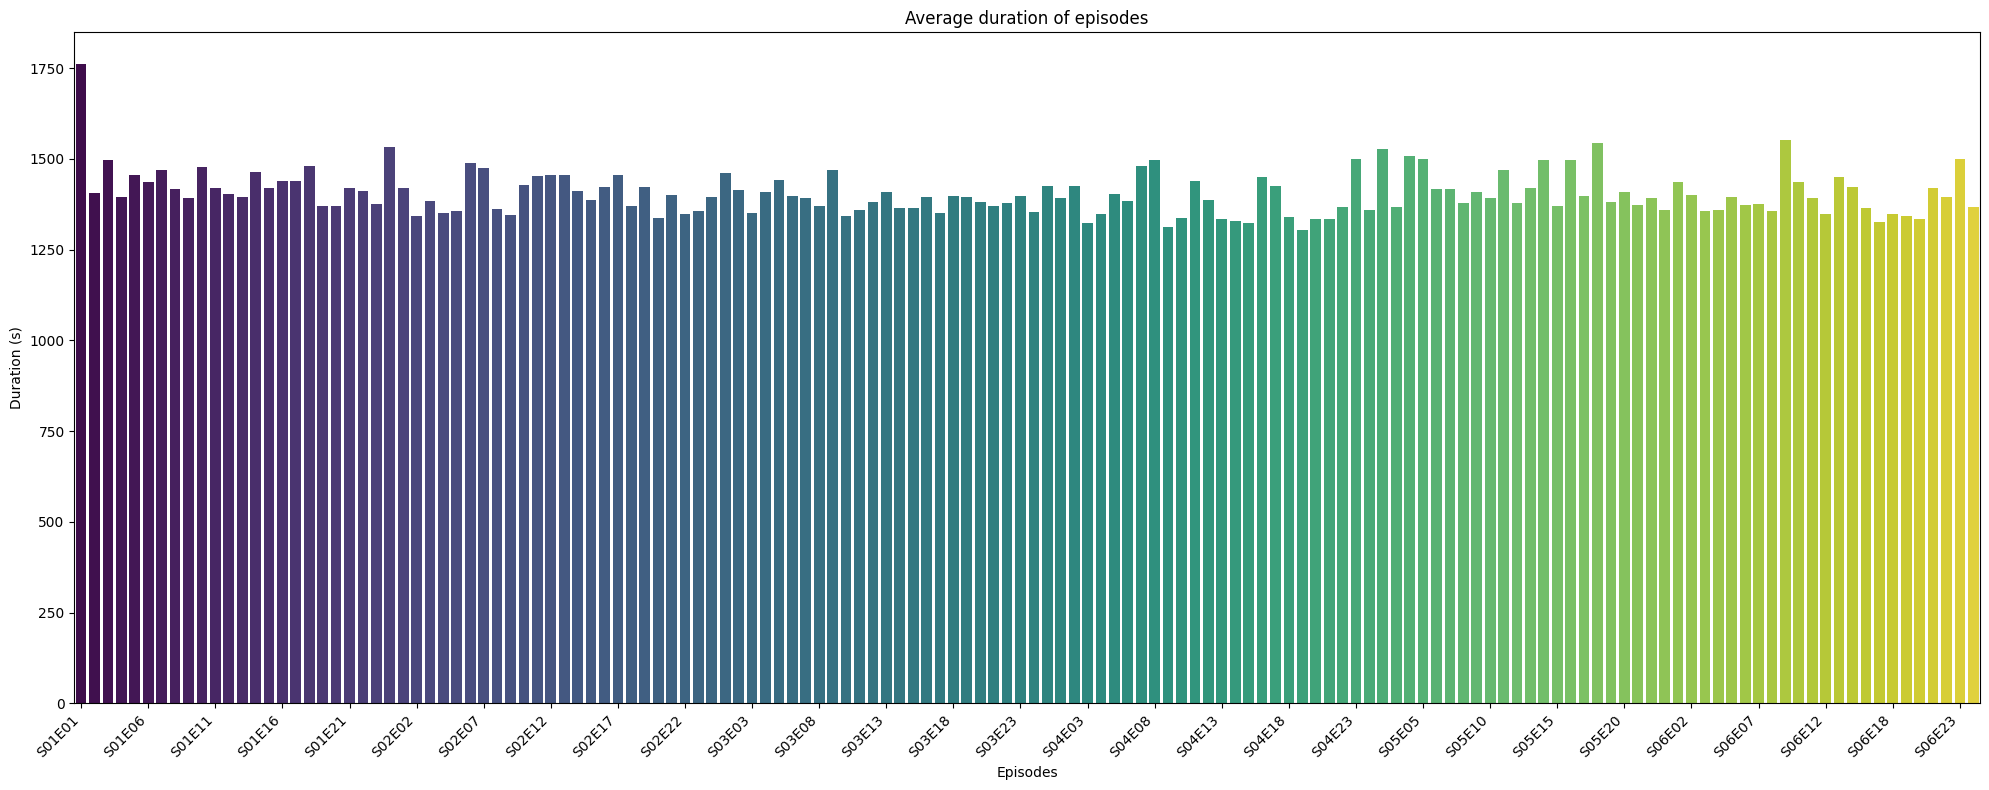

In [22]:
plt.figure(figsize=(20, 8))
ax = sns.barplot(data=episode_durations, x="episode_short", y="episode_duration", palette="viridis")
ax.set_xticks(ax.get_xticks()[::5])  # show every 5th label
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Average duration of episodes")
plt.ylabel("Duration (s)")
plt.xlabel("Episodes")
plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# List of available seasons from your data
season_options = sorted(df['season'].unique())
season_dropdown = widgets.Dropdown(
    options=season_options,
    value=season_options[0],
    description="Season:"
)

# Function to create violin plot for selected season
def update_violin(selected_season):
    # Filter dataframe for just the selected season
    filtered_df = df[df['season'] == selected_season]

    # Create violin plot
    fig = px.violin(
        filtered_df,
        x="episode_short",       # x-axis: episodes in this season
        y="duration",            # y-axis: scene durations
        color="episode_short",   # each episode gets a different color
        hover_data=["scene_number", "duration"],
        box=True,
        points="all",
        title=f"Scene Duration for Season {selected_season}"
    )

    fig.update_layout(
        xaxis_title="Episode",
        yaxis_title="Duration (seconds)",
        width=1200,       
        height=600, 
        showlegend=False
    )

    fig.show()

# Link dropdown to plot function
widgets.interact(update_violin, selected_season=season_dropdown)


interactive(children=(Dropdown(description='Season:', options=(np.int64(1), np.int64(2), np.int64(3), np.int64…

<function __main__.update_violin(selected_season)>

In [14]:
plot_violin_by_season(df)

NameError: name 'plot_violin_by_season' is not defined